In [1]:
from scipy import *
import numpy as np
from scipy.optimize import curve_fit
import matplotlib
from pylab import *

def curve_fit_custom(f, xdata, ydata, p0=None, sigma=None, **kw):
    """
    Pass all arguments to curve_fit, which uses non-linear least squares
    to fit a function, f, to data.  Calculate the uncertaities in the
    fit parameters from the covariance matrix.
    """
    popt, pcov = curve_fit(f, xdata, ydata, p0, sigma, **kw)

    if sigma is None:
        chi2 = sum(((f(xdata,*popt)-ydata))**2)
    else:
        chi2 = sum(((f(xdata,*popt)-ydata)/sigma)**2)
    dof = len(ydata) - len(popt)
    rchi2 = chi2/dof
    print ('results of general_fit:')
    print ('   chi squared = ', chi2)
    print ('   degrees of freedom = ', dof)
    print ('   reduced chi squared = ', rchi2)

    # The uncertainties are the square roots of the diagonal elements
    punc = zeros(len(popt))
    for i in arange(0,len(popt)):
        punc[i] = sqrt(pcov[i,i])
    return popt, punc, rchi2, dof

from scipy.stats import chi2
import matplotlib.patches as mpatches
from matplotlib.pyplot import errorbar
import math as m
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt



In [2]:
udecayt,utimes =loadtxt('c1=9.data',delimiter=' ',usecols=(0,1),skiprows=0,unpack=True)
index = 0
decayt = []
times = []

for i in range(0, len(udecayt), 1):
    if (udecayt[i] < 20000):
        decayt.append(udecayt[i]/1000)
        #times.append(times[i])

print(len(decayt))
#print(times)

5614


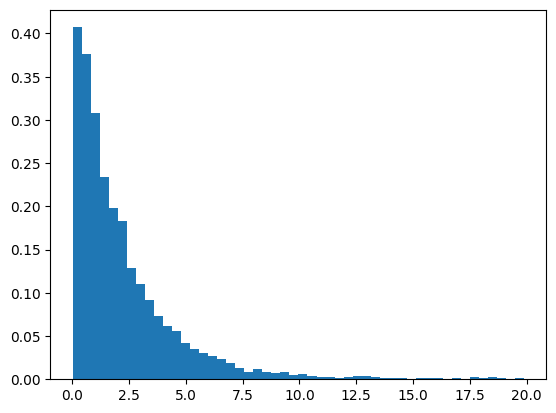

In [3]:
#figure(figsize=(10,10))
plt.hist(decayt, bins = 50,density = True)
show()


In [4]:
bins = np.linspace(min(decayt), max(decayt), 50)
#bins = np.linspace(0, 20, 50)
print(bins)
#decayCounts = np.histogram(decayt,50, range = (0,20), density=True)[0]
decayCounts = np.histogram(decayt,50, density=True)[0]

print(decayCounts)
#print(len(decayCounts))
pg1=[0.0005, 0.0005]


def f(x,k,c):
    return k*exp(-x*c)

(popt, punc, rc, d) = curve_fit_custom(f, bins, decayCounts,pg1)
print('k=',popt[0])
print('k-unc=',punc[0])
print('c=',popt[1])
print('c-unc=',punc[1])

[ 0.04        0.44489796  0.84979592  1.25469388  1.65959184  2.0644898
  2.46938776  2.87428571  3.27918367  3.68408163  4.08897959  4.49387755
  4.89877551  5.30367347  5.70857143  6.11346939  6.51836735  6.92326531
  7.32816327  7.73306122  8.13795918  8.54285714  8.9477551   9.35265306
  9.75755102 10.16244898 10.56734694 10.9722449  11.37714286 11.78204082
 12.18693878 12.59183673 12.99673469 13.40163265 13.80653061 14.21142857
 14.61632653 15.02122449 15.42612245 15.83102041 16.23591837 16.64081633
 17.04571429 17.45061224 17.8555102  18.26040816 18.66530612 19.07020408
 19.47510204 19.88      ]
[0.40715823 0.37663258 0.30839879 0.2334314  0.19841669 0.18315387
 0.12883618 0.11043101 0.09157693 0.07317177 0.0615002  0.05566441
 0.04174831 0.0345658  0.03007674 0.02648549 0.02379205 0.01930298
 0.0134672  0.00808032 0.01212048 0.00852922 0.00763141 0.00852922
 0.00538688 0.00583578 0.00359125 0.00314235 0.00269344 0.00134672
 0.00269344 0.00359125 0.00359125 0.00224453 0.00179563 

t1= 2.2936871549276296
t2= 2.15217535399908


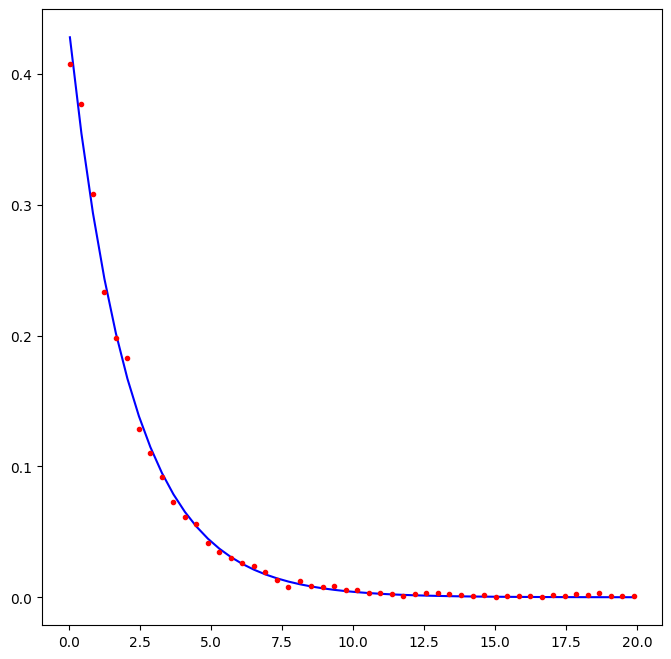

In [5]:
print("t1=",1/popt[0])
print("t2=",1/popt[1])
fit = f(bins, k=popt[0], c=popt[1])
figure(figsize=(8,8))
plot(bins, fit, 'b-')
plot(bins, decayCounts,'r.')
show()